<a href="https://colab.research.google.com/github/dlghwns100/today_TIL/blob/main/ex02)_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EB%A7%9B%EB%B3%B4%EA%B8%B0_%EC%9C%A0%EB%B0%A9%EC%95%94_%EB%8D%B0%EC%9D%B4%ED%84%B0_2%EC%A7%84%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 목표
- 환자 데이터를 바탕으로 해당 환자가 유방암인지 아닌지를 구분하는 신경망 모델을 만들어보자!

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# sklearn에서 지원해주는 학습용 유방암 데이터셋 임포트
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
# 문제
X = data['data']
# 정답
y = data['target']

In [ ]:
X.shape, y.shape

((569, 30), (569,))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(426, 30)
(143, 30)
(426,)
(143,)


### 신경망 모델링
- 1, 신경망 구조 설계
- 2, 학습 및 평가방법 설정
- 3, 학습 및 시각화
- 4, 모델평가

In [ ]:
# 1. 신경망 구조설계
# Sequential : 신경망의 뼈대를 구축하기 위한 함수
from tensorflow.keras import Sequential
# InputLayer : 신경망의 입력층을 생성
# Dense : 신경망 층(뉴런의 묶음)을 구성해주는 함수
from tensorflow.keras.layers import InputLayer, Dense

In [ ]:
# 1. 신경맘 구조 설계
model = Sequential()

# 입력층(input_dim) + 중간층 1개(Dense)
# activation : 활성화함수(들어온 자극(데이터)에 대한 응답 여부를 결정하는 함수)

model.add(Dense(50, input_dim= 30, activation= 'sigmoid'))

# 중간츨
model.add(Dense(300, activation = 'sigmoid'))
model.add(Dense(150, activation = 'sigmoid'))

# 출력층
# 출력층은 문제의 종류에 따라서 고정됨(2진분류 문제는 출력층 뉴런 개수 1개, 활성화함수는 sigmoid로 고정)
model.add(Dense(1, activation = 'sigmoid'))

model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 50)                1550      
                                                                 
 dense_23 (Dense)            (None, 300)               15300     
                                                                 
 dense_24 (Dense)            (None, 150)               45150     
                                                                 
 dense_25 (Dense)            (None, 1)                 151       
                                                                 
Total params: 62,151
Trainable params: 62,151
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
               optimizer='Adam', #최적화함수 : 확률적경사하강법(SGD) 활용
               metrics=['acc'] # metrics :평가밥법을 설정(분류 문제이므로 정확도 출력 필요)
               )

In [ ]:
h = model.fit(X_train, y_train,
              epochs = 400)

Epoch 1/400
14/14 [==============================] - 1s 2ms/step - loss: 0.6979 - acc: 0.5869
Epoch 2/400
14/14 [==============================] - 0s 2ms/step - loss: 0.6733 - acc: 0.6127
Epoch 3/400
14/14 [==============================] - 0s 2ms/step - loss: 0.6529 - acc: 0.6291
Epoch 4/400
14/14 [==============================] - 0s 2ms/step - loss: 0.6124 - acc: 0.6408
Epoch 5/400
14/14 [==============================] - 0s 2ms/step - loss: 0.5622 - acc: 0.8310
Epoch 6/400
14/14 [==============================] - 0s 2ms/step - loss: 0.5154 - acc: 0.8099
Epoch 7/400
14/14 [==============================] - 0s 2ms/step - loss: 0.4365 - acc: 0.8732
Epoch 8/400
14/14 [==============================] - 0s 2ms/step - loss: 0.3664 - acc: 0.9038
Epoch 9/400
14/14 [==============================] - 0s 2ms/step - loss: 0.2964 - acc: 0.9155
Epoch 10/400
14/14 [==============================] - 0s 2ms/step - loss: 0.2750 - acc: 0.9061
Epoch 11/400
14/14 [==============================] - 0s 2m

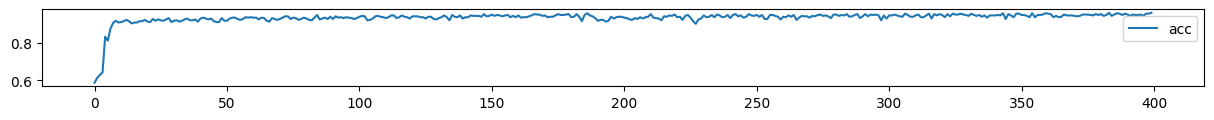

In [ ]:
# 3. 시각화
plt.figure(figsize=(15,1))

plt.plot(h.history['acc'], label='acc')

plt.legend()
plt.show()

In [ ]:
# 4, 모델평가
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.2402 - acc: 0.9231


[0.24020108580589294, 0.9230769276618958]